# Goodness-of-Fit (Third Example)

### Intro and objectives
#### review continuous distributions
### review methods to explore the distribution of continuous data

### In this lab you will learn:
1. examples of simple regression models.
2. how to fit simple regression models in Python.
3. how to compute $R^2$



In [1]:
!pip install wooldridge
import wooldridge as woo
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 5.0 MB/s 


# Example 3. Voting Outcomes and campaign expenditures



#### The file VOTE1 contains data on election outcomes and campaign expenditures for 173 two-party races for the U.S. House of Representatives in 1988. There are two candidates in each race, A and B. Let voteA be the percentage of the vote received by Candidate A and shareA be the percentage of total campaign expenditures accounted for by Candidate A. 

#### Many factors other than shareA affect the election outcome (including the quality of the candidates and possibly the dollar amounts spent by A and B). 
#### Nevertheless, we can estimate a simple regression model to find out whether spending more relative to one’s challenger implies a higher percentage of the vote.

### To study the relationship between voting outcomes and campaign expenditures, we postulate the simple model:

$ voteA=\beta_0+\beta_1*shareA+u $


### The slope parameter $\beta_1$ measures the change in annual salary, in thousands of dollars, when return on equity increases by one percentage point.

#### This means that if Candidate A’s share of spending increases by one percentage point, Candidate A receives $ \beta_1 $ .

### Using the data in VOTE1, the OLS regression line relating salary to roe is:

In [2]:
VotingData = woo.dataWoo('vote1')

In [3]:
VotingData.head()

,state,district,democA,voteA,expendA,expendB,prtystrA,lexpendA,lexpendB,shareA
0,AL,7,1,68,328.295990,8.737000,41,5.793916,2.167567,97.407669
1,AK,1,0,62,626.377014,402.476990,60,6.439952,5.997638,60.881039
2,AZ,2,1,73,99.607002,3.065000,55,4.601233,1.120048,97.014763
3,AZ,3,0,69,319.690002,26.281000,64,5.767352,3.268846,92.403702
4,AR,3,0,75,159.220993,60.054001,66,5.070293,4.095244,72.612473


In [4]:
VotingData.describe()

,district,democA,voteA,expendA,expendB,prtystrA,lexpendA,lexpendB,shareA
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,8.838150,0.554913,50.502890,310.611005,305.088537,49.757225,5.025556,4.944369,51.076545
std,8.768823,0.498418,16.784761,280.985381,306.278339,9.983650,1.601602,1.571143,33.483575
min,1.000000,0.000000,16.000000,0.302000,0.930000,22.000000,-1.197328,-0.072571,0.094635
25%,3.000000,0.000000,36.000000,81.634003,60.054001,44.000000,4.402246,4.095244,18.867996
50%,6.000000,1.000000,50.000000,242.781998,221.529999,50.000000,5.492164,5.400558,50.849903
75%,11.000000,1.000000,65.000000,457.410004,450.716003,56.000000,6.125580,6.110837,84.255096
max,42.000000,1.000000,84.000000,1470.673950,1548.192993,71.000000,7.293476,7.344844,99.495003


In [5]:
type(VotingData)

pandas.core.frame.DataFrame

In [6]:
# We impose a simple, linear, model: 
# We specify CeoSalaries as the empirical dataset

reg = smf.ols(formula='voteA ~ shareA', data=VotingData)


In [7]:
# We fit the model
results = reg.fit()


In [8]:
b = results.params
print(f'b: \n{b}\n')

b: 
Intercept    26.812214
shareA        0.463827
dtype: float64



## Based on the previous we have fitted the following model:

$ salary=26.81+0.46*roe+u $


## Let's compute $R^2$

In [11]:
results.rsquared

0.8561408655827665

In [12]:
100*results.rsquared

85.61408655827665

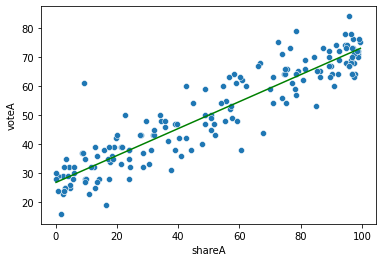

In [13]:
sns.scatterplot(data=VotingData, x='shareA',y='voteA')

sns.lineplot(data=VotingData, x=VotingData['shareA'], y=results.fittedvalues,color='green')
